# EXERCISE 1: image filtering
From the datasets (images) available from skimage data, choose an RGB image and do the following:

Crop the image

Smoothen the image with a kernel filter.

Sharpen the image with a kernel filter

Find the edges of the image with at least two different methods.

From the processes above, save the image that you prefer as a .jpg

https://scikit-image.org/docs/dev/api/skimage.data.html

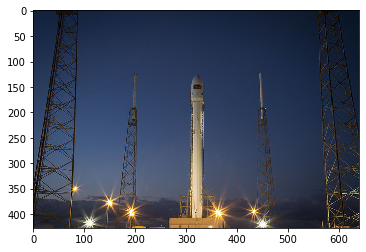

In [172]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import scipy
import skimage
from skimage import data
image = data.rocket()
plt.imshow(image)
plt.show()

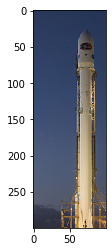

In [173]:
# Crop the image
plt.imshow(image[100:400, 250:350])
plt.show()

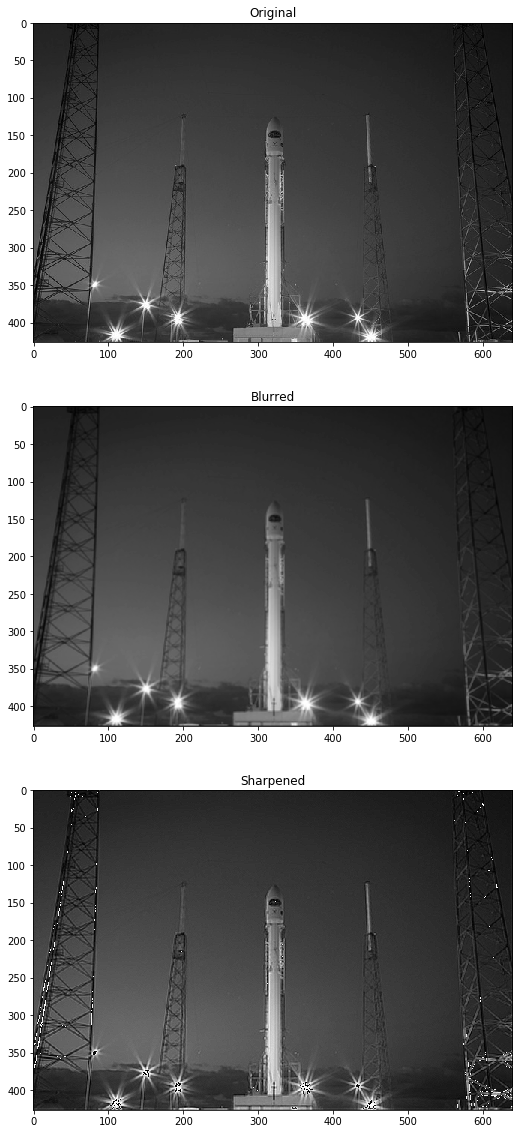

In [175]:
fig, ax = plt.subplots(nrows = 3, figsize = (15,20))

# Smoothen the image with a kernel filter.
kernel = np.array([ [1/9,1/9,1/9], 
                   [1/9,1/9,1/9], 
                   [1/9,1/9,1/9]])  
blurred_rocket = scipy.ndimage.convolve(image[:,:,1], kernel, mode='constant', cval=0.0)

# Sharpen the image with a kernel filter
kernel = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])
sharpened_rocket = scipy.ndimage.convolve(blurred_rocket, kernel, mode='constant', cval=0.0)

ax[0].imshow(image[:,:,1], cmap=plt.cm.gray)
ax[1].imshow(blurred_rocket, cmap=plt.cm.gray)
ax[2].imshow(sharpened_rocket, cmap=plt.cm.gray)

ax[0].set_title("Original")
ax[1].set_title("Blurred")
ax[2].set_title("Sharpened")
plt.show()

Text(0.5, 1.0, 'Sobel Edge Detection')

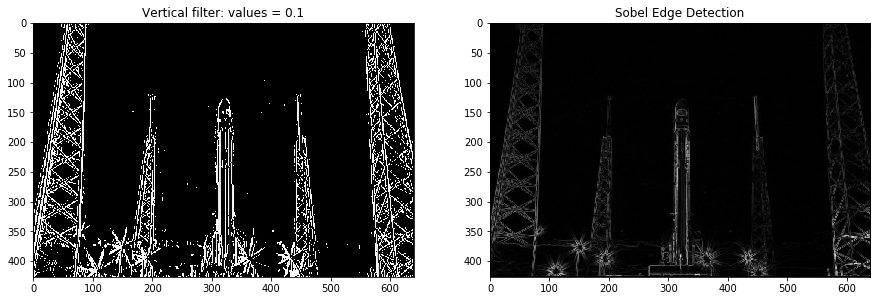

In [176]:
from skimage.filters import roberts, sobel
# Find the edges of the image with at least two different methods.
fig, ax = plt.subplots(ncols = 2, figsize = (15,5))

# Method 1: Vertical filter - modified values
kernel = np.array([ [-.1, 0, .1], 
                    [-.1, 0, .1], 
                    [-.1, 0, .1]])
v_filtered = scipy.ndimage.convolve(image[:,:,1], kernel, mode='mirror', cval=0.0)
ax[0].imshow(v_filtered, cmap=plt.cm.gray)
ax[0].set_title('Vertical filter: values = 0.1')
             
# Method 2: Sobel
v_filtered = scipy.ndimage.convolve(image[:,:,1], kernel, mode='mirror', cval=0.0)
ax[1].imshow(sobel(image[:,:,1]), cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

In [8]:
# Save image as .jpg
skimage.io.imsave("vertical_filter.jpeg", v_filtered)

# EXERCISE 2: semi-super resolution!
Take one image on your own (or one blurred image from somewhere) and apply the techniques we have seen in class to sharpen an image from a blurred one. You can also blur one image of your own as a start.

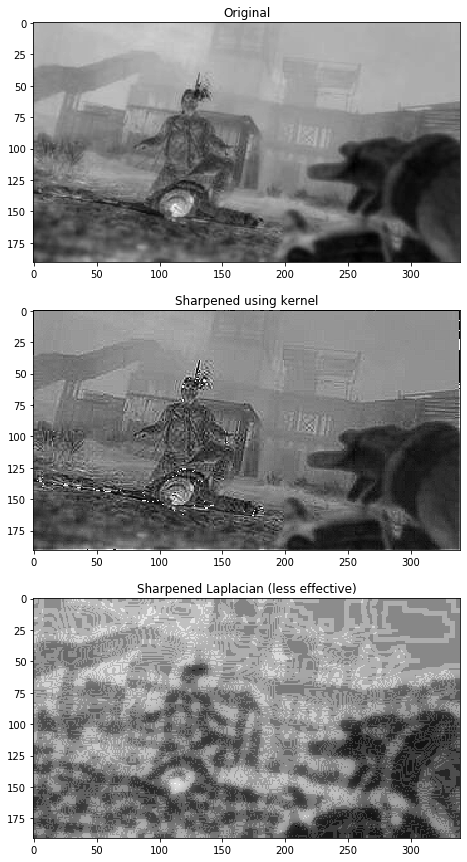

In [9]:
shep = plt.imread("shepherd.jpg")[:,:,1]
fig, ax = plt.subplots(nrows = 3, figsize = (10,15))

ax[0].imshow(shep, cmap=plt.cm.gray)
ax[0].set_title('Original')

# Sharpen the image with a kernel filter
kernel = np.array([ [0, -1, 0], 
                    [-1, 5.3, -1], 
                    [0, -1, 0]])
sharp = scipy.ndimage.convolve(shep, kernel, mode='constant', cval=0.0)
ax[1].imshow(sharp, cmap=plt.cm.gray)
ax[1].set_title('Sharpened using kernel')

# Sharpened using Laplacian
shep_blur = scipy.ndimage.gaussian_filter(shep, 3)
filter_shep_blur = scipy.ndimage.gaussian_filter(shep_blur, 1)
alpha = 30
shep_sharp = shep_blur + alpha * (shep_blur - filter_shep_blur)
ax[2].imshow(shep_sharp, cmap=plt.cm.gray)
ax[2].set_title('Sharpened Laplacian (less effective)')

plt.show()

# EXERCISE 3: image segmentation
Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background, preferably dark over white or similar such as coins, chessboard, etc.).

Load the image with scikit image 

Count the objects in the image using region based segmentation 

Try to fix the image using opening/closing algorithms

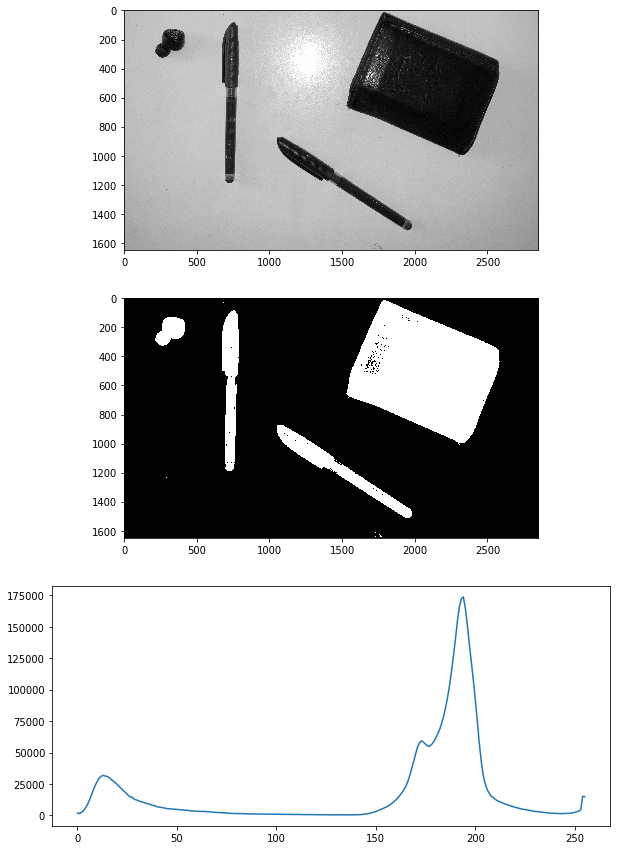

In [136]:
from skimage.exposure import histogram
ispy = skimage.io.imread('ispy_3.jpg')[1250:2900, 750:3600,1]

fig, ax = plt.subplots(nrows = 3, figsize = (10,15))

ax[0].imshow(ispy, cmap = plt.cm.gray)

ax[1].imshow(ispy < 130, cmap=plt.cm.gray)

hist, hist_centers = histogram(ispy)
ax[2].plot(hist_centers,hist)
plt.show()

Number of objects: 4


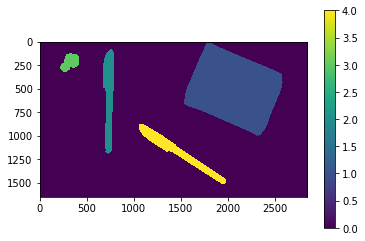

In [138]:
# Count the objects in the picture using region based segmentation
# (Should output 26)

from skimage.morphology import watershed
from scipy import ndimage as ndi

# Create markers array
markers = np.zeros_like(ispy)
markers[ispy >= 130] = 1 # background
markers[ispy < 130] = 2 # objects

# Watershed
seg_ispy = watershed(sobel(ispy), markers)

# Morphology to fill holes
seg_thresh = ndi.binary_fill_holes(seg_ispy - 1)
seg_thresh_2 = ndi.binary_opening(seg_thresh)


# remove small objects
ispy_objs, labels = ndi.label(seg_thresh_2)

# calculate sizing
ispy_sizes = np.bincount(ispy_objs.ravel())
mask_ispy_sizes = ispy_sizes > 1000
mask_ispy_sizes[0] = 0
ispy_objs_cleaned = mask_ispy_sizes[ispy_objs]
ispy_objs_cleaned, labels_cleaned = ndi.label(ispy_objs_cleaned)

print("Number of objects:",labels_cleaned)
plt.imshow(ispy_objs_cleaned)
plt.colorbar()
plt.show()

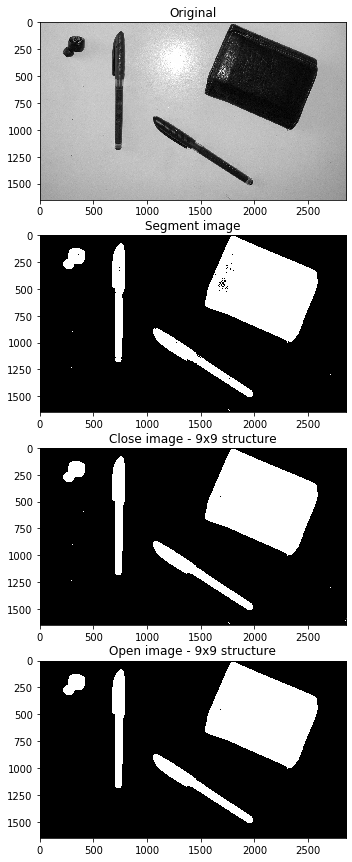

In [170]:
from scipy import ndimage
# Fix image with opening/closing algorithms
fig, ax = plt.subplots(nrows = 4, figsize = (10,15))

ax[0].imshow(ispy, cmap = plt.cm.gray)
ax[0].set_title('Original')

# Segment
threshold = ispy < 140
ax[1].imshow(threshold, cmap = plt.cm.gray)
ax[1].set_title('Segment image')

# Close image
closed = ndimage.binary_closing(threshold, structure=np.ones((9,9)))
ax[2].imshow(closed, cmap = plt.cm.gray)
ax[2].set_title('Close image - 9x9 structure')

# Open image
opened = ndimage.binary_opening(closed, structure=np.ones((9,9)))
ax[3].imshow(opened, cmap = plt.cm.gray)
ax[3].set_title('Open image - 9x9 structure')

plt.show()